### Example for reading the LENS2 dataset and extract SST time-series for case 1

In [100]:
# Load required modules
import numpy as np
from datetime import date
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
# Load marineHeatWaves definition module
import marineHeatWaves as mhw
from distributed import Client
from ncar_jobqueue import NCARCluster
import intake
import pop_tools
from misc import get_ij
import warnings, getpass
warnings.filterwarnings("ignore")

In [101]:
cluster = NCARCluster(cores=4,
    processes=1,
    resource_spec='select=1:ncpus=1:mem=50GB',
)
cluster.scale(20)
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: dask_jobqueue.PBSCluster
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/gmarques/high-mem/proxy/40439/status,
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/gmarques/high-mem/proxy/40439/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.12.206.63:35912,Workers: 0
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/gmarques/high-mem/proxy/40439/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [3]:
catalog = intake.open_esm_datastore(
    '/glade/collections/cmip/catalog/intake-esm-datastore/catalogs/glade-cesm2-le.json'
)
catalog

,unique
component,6
stream,26
case,200
member_id,100
variable,1906
start_time,157
end_time,180
time_range,163
long_name,1800
units,184


In [4]:
cat_subset = catalog.search(component='ocn', 
               variable='SST',
               frequency='day_1') #.unique()

In [5]:
cat_subset.df.head()

,component,stream,case,member_id,variable,start_time,end_time,time_range,long_name,units,vertical_levels,frequency,path,experiment,forcing_variant,cesm_member_id,control_branch_year,cmip_experiment_id
0,ocn,pop.h.nday1,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,SST,1850-01-01,1860-01-01,18500101-18600101,Surface Potential Temperature,degC,1.0,day_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
1,ocn,pop.h.nday1,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,SST,1860-01-02,1870-01-01,18600102-18700101,Surface Potential Temperature,degC,1.0,day_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
2,ocn,pop.h.nday1,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,SST,1870-01-02,1880-01-01,18700102-18800101,Surface Potential Temperature,degC,1.0,day_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
3,ocn,pop.h.nday1,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,SST,1880-01-02,1890-01-01,18800102-18900101,Surface Potential Temperature,degC,1.0,day_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
4,ocn,pop.h.nday1,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,SST,1890-01-02,1900-01-01,18900102-19000101,Surface Potential Temperature,degC,1.0,day_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1


In [6]:
%%time
dset_dict_raw = cat_subset.to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream.forcing_variant.variable'


CPU times: user 1min 2s, sys: 2.76 s, total: 1min 4s
Wall time: 1min 53s


In [7]:
[key for key in dset_dict_raw.keys()]

['ocn.ssp370.pop.h.nday1.cmip6.SST',
 'ocn.historical.pop.h.nday1.smbb.SST',
 'ocn.historical.pop.h.nday1.cmip6.SST',
 'ocn.ssp370.pop.h.nday1.smbb.SST']

In [8]:
ds_cmip6 = dset_dict_raw['ocn.historical.pop.h.nday1.cmip6.SST'] 

In [9]:
ds_cmip6

<xarray.Dataset>
Dimensions:                 (z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60, z_w_bot: 60, nlat: 384, nlon: 320, time: 60225, d2: 2, member_id: 50)
Coordinates:
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time                    (time) object 1850-01-02 00:00:00 ... 2015-01-01 ...
  * member_id               (member_id) <U12 'r10i1181p1f1' ... 'r9i1301p1f1'
Dimensions without coordinates: nlat, nlon, d2
Data variables: (12/52)
    dz                      (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    dzw                     (z_w) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    KMT                     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    KMU                     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    REGION_MASK             (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    UAREA                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ...                      ...
    salinity_factor         float64 ...
    sflux_factor            float64 ...
    nsurface_t              float64 ...
    nsurface_u              float64 ...
    time_bound              (time, d2) object dask.array<chunksize=(3650, 2), meta=np.ndarray>
    SST                     (member_id, time, nlat, nlon) float32 dask.array<chunksize=(1, 3650, 384, 320), meta=np.ndarray>
Attributes:
    source:                  CCSM POP2, the CCSM Ocean Component
    model_doi_url:           https://doi.org/10.5065/D67H1H0V
    time_period_freq:        day_1
    revision:                $Id$
    history:                 none
    cell_methods:            cell_methods = time: mean ==> the variable value...
    calendar:                All years have exactly  365 days.
    intake_esm_varname:      ['SST']
    Conventions:             CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf...
    contents:                Diagnostic and Prognostic Variables
    intake_esm_dataset_key:  ocn.historical.pop.h.nday1.cmip6.SST

In [10]:
ds_smbb = dset_dict_raw['ocn.historical.pop.h.nday1.smbb.SST'] 

In [11]:
ds_smbb

<xarray.Dataset>
Dimensions:                 (z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60, z_w_bot: 60, nlat: 384, nlon: 320, time: 60225, d2: 2, member_id: 50)
Coordinates:
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time                    (time) object 1850-01-02 00:00:00 ... 2015-01-01 ...
  * member_id               (member_id) <U12 'r10i1191p1f2' ... 'r9i1171p1f2'
Dimensions without coordinates: nlat, nlon, d2
Data variables: (12/52)
    dz                      (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    dzw                     (z_w) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    KMT                     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    KMU                     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    REGION_MASK             (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    UAREA                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ...                      ...
    salinity_factor         float64 ...
    sflux_factor            float64 ...
    nsurface_t              float64 ...
    nsurface_u              float64 ...
    time_bound              (time, d2) object dask.array<chunksize=(3650, 2), meta=np.ndarray>
    SST                     (member_id, time, nlat, nlon) float32 dask.array<chunksize=(1, 3650, 384, 320), meta=np.ndarray>
Attributes:
    source:                  CCSM POP2, the CCSM Ocean Component
    model_doi_url:           https://doi.org/10.5065/D67H1H0V
    time_period_freq:        day_1
    revision:                $Id$
    history:                 none\nModified to correct REGION_MASK and SST Fi...
    cell_methods:            cell_methods = time: mean ==> the variable value...
    calendar:                All years have exactly  365 days.
    intake_esm_varname:      ['SST']
    Conventions:             CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf...
    contents:                Diagnostic and Prognostic Variables
    intake_esm_dataset_key:  ocn.historical.pop.h.nday1.smbb.SST

In [12]:
ds_all = xr.concat([ds_cmip6,ds_smbb], dim='member_id', 
                     data_vars='minimal',coords="minimal",
                     compat="override")
#ds_all

In [13]:
ds_all

<xarray.Dataset>
Dimensions:                 (z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60, z_w_bot: 60, nlat: 384, nlon: 320, time: 60225, d2: 2, member_id: 100)
Coordinates:
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time                    (time) object 1850-01-02 00:00:00 ... 2015-01-01 ...
  * member_id               (member_id) <U12 'r10i1181p1f1' ... 'r9i1171p1f2'
Dimensions without coordinates: nlat, nlon, d2
Data variables: (12/52)
    dz                      (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    dzw                     (z_w) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    KMT                     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    KMU                     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    REGION_MASK             (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    UAREA                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ...                      ...
    salinity_factor         float64 ...
    sflux_factor            float64 ...
    nsurface_t              float64 ...
    nsurface_u              float64 ...
    time_bound              (time, d2) object dask.array<chunksize=(3650, 2), meta=np.ndarray>
    SST                     (member_id, time, nlat, nlon) float32 dask.array<chunksize=(1, 3650, 384, 320), meta=np.ndarray>
Attributes:
    source:                  CCSM POP2, the CCSM Ocean Component
    model_doi_url:           https://doi.org/10.5065/D67H1H0V
    time_period_freq:        day_1
    revision:                $Id$
    history:                 none
    cell_methods:            cell_methods = time: mean ==> the variable value...
    calendar:                All years have exactly  365 days.
    intake_esm_varname:      ['SST']
    Conventions:             CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf...
    contents:                Diagnostic and Prognostic Variables
    intake_esm_dataset_key:  ocn.historical.pop.h.nday1.cmip6.SST

In [14]:
# read the pop 1 deg grid from pop_tools
# we will use variables TLONG and TLAT
pop_grid = pop_tools.get_grid('POP_gx1v7')

In [15]:
# in ds, TLONG and TLAT have missing values (NaNs)
# so we need to override them with the values from
# pop_grid, which does not have missing values
ds_cmip6['TLONG'] = pop_grid.TLONG
ds_cmip6['TLAT'] = pop_grid.TLAT

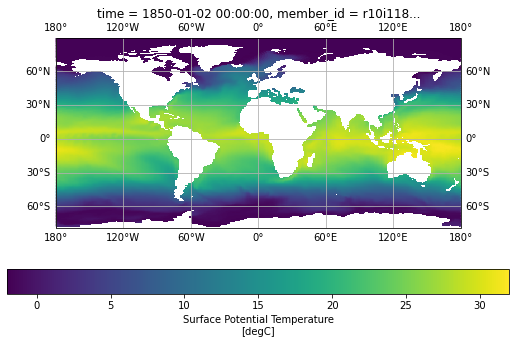

In [16]:
plt.figure(figsize=(9,5));
ax = plt.axes(projection=ccrs.PlateCarree());
pc = ds_cmip6.SST.isel(time=0, member_id=0).plot.pcolormesh(ax=ax, 
                                    transform=ccrs.PlateCarree(),
                                    x='TLONG', 
                                    y='TLAT',
                                    vmin=-2,
                                    vmax=32,
                                    cbar_kwargs={"orientation": "horizontal"},)

   
ax.gridlines(draw_labels=True);

### Case study: a region near Western Australia

Select the region where the SST time-series will be extracted.

In [163]:
#i, j = get_ij(112.5, -29.5, pop_grid)
i, j = get_ij(90, -22, pop_grid)
print('i = {}, j = {}'.format(i,j))
# number of grid points to expand over all directions
n = 10
print('Region is defined by i = {},{}, j = {},{}'.format(i-n, 
                                             i+n,
                                             j-n,
                                            j+n))


i = 115, j = 109
Region is defined by i = 105,125, j = 99,119


In [165]:
# extract area and define start and end dates
area = pop_grid.TAREA.isel(nlon = slice(i-n,i+n), 
                           nlat = slice(j-n,j+n))
start="1982-01-01"
end="2014-12-31"

In [174]:
path_oisst = '/glade/scratch/{}/noaa.oisst.v2.highres/'.format(getpass.getuser())
oisst=xr.open_dataset(path_oisst+'oisst_remapped_POP_gx1v7.nc') 
wa_ds_remapped = oisst.isel(nlon = slice(i-n,i+n), nlat = slice(j-n,j+n), 
             ).sel(time = slice(start,end)).weighted(area).mean(dim=['nlat','nlon']).load()
#wa_ds_filtered

In [178]:
%%time
wa_ds_cmip6 = ds_cmip6.SST.isel(nlon = slice(i-n,i+n), 
                                nlat = slice(j-n,j+n), 
             ).sel(time = slice(start,end)).weighted(area).mean(dim=['nlat','nlon']).load()

CPU times: user 7.87 s, sys: 453 ms, total: 8.32 s
Wall time: 1min 26s


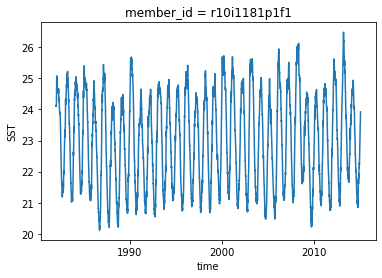

In [179]:
fig, ax = plt.subplots()
wa_ds_cmip6.isel(member_id=0).plot(ax=ax)

In [180]:
%%time
wa_ds_smbb = ds_smbb.SST.isel(nlon = slice(i-n,i+n), 
                              nlat = slice(j-n,j+n), 
             ).sel(time = slice(start,end)).weighted(area).mean(dim=['nlat','nlon']).load()

CPU times: user 8.85 s, sys: 503 ms, total: 9.35 s
Wall time: 1min 30s


In [181]:
%%time
wa_ds_all = ds_all.SST.isel(nlon = slice(i-n,i+n), nlat = slice(j-n,j+n), 
             ).sel(time = slice(start,end)).weighted(area).mean(dim=['nlat','nlon']).load()

CPU times: user 20.4 s, sys: 1.19 s, total: 21.6 s
Wall time: 2min 50s


In [182]:
#wa_ds_cmip6.time
times = xr.cftime_range("1982-01-01", "2014-12-31", calendar="julian")
len(times)

12053

Text(0.5, 1.0, 'LENS cmip6 (lightblue; mean in blue),              LENS smbb (gray; mean in red), wa_ds_remapped (black)')

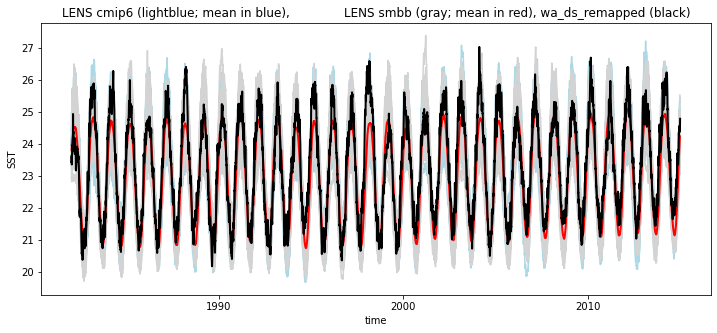

In [183]:
f, ax = plt.subplots(1, 1, figsize=(12, 5))

wa_ds_cmip6.plot(ax=ax,hue="member_id",add_legend=False, color='lightblue', label='historical');
wa_ds_cmip6.mean('member_id').plot(ax=ax,color='blue', label='mean historical', lw=2)


wa_ds_smbb.plot(ax=ax,hue="member_id",add_legend=False, color='lightgray', label='ssp370');
wa_ds_smbb.mean('member_id').plot(ax=ax,color='red', label='mean ssp370', lw=2)


ax.plot(times,wa_ds_remapped.sst.values,color='k', label='oisst' , lw=2)
ax.set_title('LENS cmip6 (lightblue; mean in blue), \
             LENS smbb (gray; mean in red), wa_ds_remapped (black)')
#ax.legend()

### Compute Marine Heatwaves

In [184]:
# Generate time vector for the obs using datetime format 
# (January 1 of year 1 is day 1)
t_obs = np.arange(date(1982,1,1).toordinal(),
                  date(2014,12,31).toordinal()+1)
dates = [date.fromordinal(tt.astype(int)) for tt in t_obs]

In [202]:
#obs
mhws_obs, clim_obs = mhw.detect(t_obs, 
    wa_ds_remapped.sst.values)

In [203]:
time_idx = wa_ds_cmip6.indexes['time'].to_datetimeindex()
t = np.zeros(len(time_idx))
for i in range(len(time_idx)):
  t[i] = date(time_idx[i].year, 
              time_idx[i].month, time_idx[i].day).toordinal()

t = t.astype(int)

In [204]:
dates = [date.fromordinal(tt.astype(int)) for tt in t]

In [205]:
mhws_cmip6 = []
clim_cmip6 = []
for i in range(len(wa_ds_cmip6.member_id)):
    mhws, clim = mhw.detect(t, wa_ds_cmip6[i,:].values,
          alternateClimatology=[t_obs, wa_ds_remapped.sst.values])
    mhws_cmip6.append(mhws)
    clim_cmip6.append(clim)

In [206]:
# mean from all cmip6 members
mhws_cmip6_mean, clim_cmip6_mean = mhw.detect(t,
                wa_ds_cmip6.mean('member_id').values,
                alternateClimatology=[t_obs, 
                wa_ds_remapped.sst.values])

In [207]:
mhws_smbb = []
clim_smbb = []
for i in range(len(wa_ds_smbb.member_id)):
    mhws, clim = mhw.detect(t, wa_ds_smbb[i,:].values,
                           alternateClimatology=[t_obs, 
                           wa_ds_remapped.sst.values])
    mhws_smbb.append(mhws)
    clim_smbb.append(clim)

In [208]:
# mean from all smbb members
#mhws_smbb_mean, clim_smbb_mean = mhw.detect(t, 
#                wa_ds_smbb.mean('member_id').values)

In [209]:
# mean from all cmip6 and smbb members combined
#mhws_all_mean, clim_all_mean = mhw.detect(t, 
#               wa_ds_all.mean('member_id').values)

In [216]:
nevents_cmip6 = []
intensity_cmip6 = []
cat1_cmip6 = []
cat2_cmip6 = []
cat3_cmip6 = []
cat4_cmip6 = []
for i in range(len(wa_ds_cmip6.member_id)):
  nevents_cmip6.append(mhws_cmip6[i]['n_events'])
  intensity_cmip6.append(np.max(np.array(mhws_cmip6[i]['intensity_max'])))
  tmp = np.array(mhws_cmip6[i]['category'])
  cat1_cmip6.append(len(np.where(tmp=='Moderate')[0]))
  cat2_cmip6.append(len(np.where(tmp=='Strong')[0]))
  cat3_cmip6.append(len(np.where(tmp=='Severe')[0]))
  cat4_cmip6.append(len(np.where(tmp=='Extreme')[0]))

In [217]:
nevents_obs = mhws_obs['n_events']
intensity_obs = np.max(np.array(mhws_obs['intensity_max']))
cat1_obs = []
cat2_obs = []
cat3_obs = []
cat4_obs = []

tmp = np.array(mhws_obs['category'])
cat1_obs.append(len(np.where(tmp=='Moderate')[0]))
cat2_obs.append(len(np.where(tmp=='Strong')[0]))
cat3_obs.append(len(np.where(tmp=='Severe')[0]))
cat4_obs.append(len(np.where(tmp=='Extreme')[0]))

In [218]:
nevents_smbb = []
intensity_smbb = []
for i in range(len(wa_ds_smbb.member_id)):
  nevents_smbb.append(mhws_smbb[i]['n_events'])
  intensity_smbb.append(np.max(np.array(mhws_smbb[i]['intensity_mean'])))

In [219]:
member_id1 = np.arange(1,51)
member_id2 = np.arange(51,101)

### Number of events

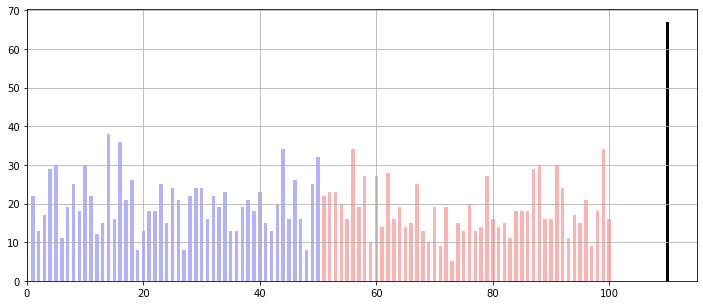

In [220]:
plt.figure(figsize=(12,5))
plt.bar(member_id1,nevents_cmip6,color='blue',width=0.6, alpha=0.3)
plt.bar(member_id2,nevents_smbb,color='red',width=0.6, alpha=0.3)
plt.bar([110],nevents_obs,color='k',width=0.6)
plt.xlim(0,115);
plt.grid()

### Max intensity

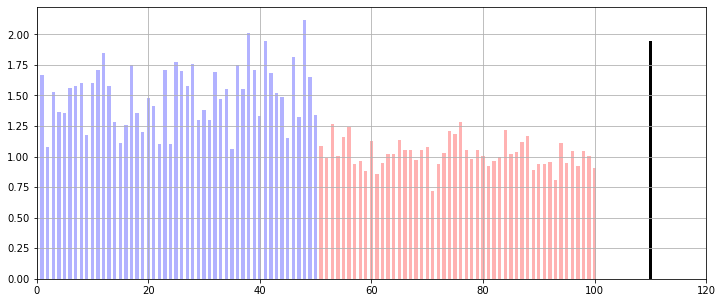

In [221]:
plt.figure(figsize=(12,5))
plt.bar(member_id1,intensity_cmip6,color='blue',width=0.6, alpha=0.3)
plt.bar(member_id2,intensity_smbb,color='red',width=0.6, alpha=0.3)
plt.bar([110],intensity_obs,color='k',width=0.6)

plt.xlim(0,120)
plt.grid()

In [201]:
mhws.keys()

dict_keys(['time_start', 'time_end', 'time_peak', 'date_start', 'date_end', 'date_peak', 'index_start', 'index_end', 'index_peak', 'duration', 'duration_moderate', 'duration_strong', 'duration_severe', 'duration_extreme', 'intensity_max', 'intensity_mean', 'intensity_var', 'intensity_cumulative', 'intensity_max_relThresh', 'intensity_mean_relThresh', 'intensity_var_relThresh', 'intensity_cumulative_relThresh', 'intensity_max_abs', 'intensity_mean_abs', 'intensity_var_abs', 'intensity_cumulative_abs', 'category', 'rate_onset', 'rate_decline', 'n_events'])